<font size=+4 color="Black"><center><b>Vehicle Loan Default Prediction</b></center></font>
<font size=-1 color="Black"><center><b>Classification Models </b></right></font>

<font size="+2" color="Green"><b>Please Upvote if you like the work</b></font>


### About this notebook

## Banking industry is using classification models to predict the default or raise red flags on the accounts which are likely to default. One major problem is of Imbalanced Distribution of classes i.e. the available training data consists more of non-default accounts vs. default accounts. Here is my take on tackling such a problem.
## This notebook covers various EDA, Outlier treatment, PCA, Variable Inspection, Classification models etc.


![](https://media3.giphy.com/media/mnptBuEshROyk/giphy.gif)



### Plenty of times we get data where there is imbalanced class distribution. This notebooks covers the existing methodologies to tackle such problems.[](http://)

Contents:

* [1. Importing data & libraries](#1)
* [2. Variable Inspection](#2)
* [3. EDA](#3)
    * [3.1 Class Distribution](#4)
    * [3.2 Default Timeline](#5)
    * [3.3 Univariate analysis](#6)  
    * [3.4 Outlier Treatment](#7)
    * [3.5 Feature Selection](#8)
        * [3.5.1 Standardization of data](#9)
        * [3.5.2 Dummy insertion](#10)
* [4. Models](#11)
    * [4.1 Logistic Regression](#12)
    * [4.2 Random Forest](#13)
    * [4.3 Naive Bayes](#14)
    * [4.4 Stochastic Gradient Descent](#15)
    * [4.5 Decision Tree Classifier](#16)
    * [4.6 XG Boost](#17)
* [5. Dealing with Imbalanced Data](#18)
    * [5.1 SMOTE](#19)
    * [5.2 Upsampling](#20)
    * [5.3 Downsampling](#21)
    * [5.4 PCA](#22)
    * [5.1 Resampling](#23)

 <a id="1"></a>
    
<font size="+2" color="indigo"><b>1. Importing data & libraries</b></font><br>

In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots



from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

#for displaying 500 results in pandas dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import itertools
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
import warnings

In [3]:
        
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')


In [4]:
df= pd.concat ([train, test])

In [5]:
#Shape of dataframe
print(" Shape of training dataframe: ", train.shape)
print(" Shape of testing dataframe: ", test.shape)
# Drop duplicates
train.drop_duplicates()
test.drop_duplicates()
print(train.shape)
print(test.shape)

 Shape of training dataframe:  (233154, 41)
 Shape of testing dataframe:  (112392, 40)
(233154, 41)
(112392, 40)


 <a id="2"></a>
    
<font size="+2" color="indigo"><b>2. Variable Inspection</b></font><br>

In [6]:
print("Names of columns ", list(train.columns))

Names of columns  ['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH', 'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT']


In [7]:
#Null values in training dataset

null= train.isnull().sum().sort_values(ascending=False)
total =train.shape[0]
percent_missing= (train.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data.sort_values(by ='Total missing', ascending = False))

Null Values in each column:
                             column name  Total missing  Percent missing
0                       EMPLOYMENT_TYPE           7661         0.032858
21        PERFORM_CNS_SCORE_DESCRIPTION              0         0.000000
23                       DISBURSAL_DATE              0         0.000000
24                           ASSET_COST              0         0.000000
25                                  LTV              0         0.000000
26                            BRANCH_ID              0         0.000000
27                          SUPPLIER_ID              0         0.000000
28                      MANUFACTURER_ID              0         0.000000
29                   CURRENT_PINCODE_ID              0         0.000000
30                        DATE_OF_BIRTH              0         0.000000
31                             STATE_ID              0         0.000000
32                    PERFORM_CNS_SCORE              0         0.000000
33                     EMPLOYEE_COD

In [8]:
#Null values in test dataset

null= test.isnull().sum().sort_values(ascending=False)
total =test.shape[0]
percent_missing= (test.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data.sort_values(by ='Total missing', ascending = False))

Null Values in each column:
                             column name  Total missing  Percent missing
0                       EMPLOYMENT_TYPE           3443         0.030634
1                              UNIQUEID              0         0.000000
22                       DISBURSAL_DATE              0         0.000000
23                           ASSET_COST              0         0.000000
24                                  LTV              0         0.000000
25                            BRANCH_ID              0         0.000000
26                          SUPPLIER_ID              0         0.000000
27                      MANUFACTURER_ID              0         0.000000
28                   CURRENT_PINCODE_ID              0         0.000000
29                        DATE_OF_BIRTH              0         0.000000
30                             STATE_ID              0         0.000000
31                    PERFORM_CNS_SCORE              0         0.000000
32                     EMPLOYEE_COD

 #### Flag 1: 3443 missing values in employment type

In [9]:
train_null_unique= train.EMPLOYMENT_TYPE .unique()
test_null_unique= test.EMPLOYMENT_TYPE .unique()
print(train_null_unique)
print (test_null_unique)

['Salaried' 'Self employed' nan]
['Salaried' 'Self employed' nan]


In [10]:
train.EMPLOYMENT_TYPE= train.EMPLOYMENT_TYPE.fillna("Missing")
test.EMPLOYMENT_TYPE= test.EMPLOYMENT_TYPE .fillna("Missing")
train_null_unique= train.EMPLOYMENT_TYPE .unique()
test_null_unique= test.EMPLOYMENT_TYPE .unique()
print(train_null_unique)
print (test_null_unique)

['Salaried' 'Self employed' 'Missing']
['Salaried' 'Self employed' 'Missing']


In [11]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      233154 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

#### Flag 2:
#### AVERAGE_ACCT_AGE, CREDIT_HISTORY_LENGTH are object, but they should be int. 
#### DATE_OF_BIRTH & DISBURSAL_DATE should be datetime type

#### Lets' check...

In [12]:
# Changing AVERAGE_ACCT_AGE & CREDIT_HISTORY_LENGTH

train[['AVERAGE_ACCT_Yr','AVERAGE_ACCT_Month']] = train['AVERAGE_ACCT_AGE'].str.split("yrs",expand=True)
train[['AVERAGE_ACCT_Month','AVERAGE_ACCT_Month1']] = train['AVERAGE_ACCT_Month'].str.split("mon",expand=True)
train["AVERAGE_ACCT_AGE"]= train["AVERAGE_ACCT_Yr"].astype(str).astype(int)+((train["AVERAGE_ACCT_Month"].astype(str).astype(int))/12)
train= train.drop(columns= ["AVERAGE_ACCT_Yr","AVERAGE_ACCT_Month",'AVERAGE_ACCT_Month1'])

test[['AVERAGE_ACCT_Yr','AVERAGE_ACCT_Month']] = test['AVERAGE_ACCT_AGE'].str.split("yrs",expand=True)
test[['AVERAGE_ACCT_Month','AVERAGE_ACCT_Month1']] = test['AVERAGE_ACCT_Month'].str.split("mon",expand=True)
test["AVERAGE_ACCT_AGE"]= test["AVERAGE_ACCT_Yr"].astype(str).astype(int)+((test["AVERAGE_ACCT_Month"].astype(str).astype(int))/12)
test= test.drop(columns= ["AVERAGE_ACCT_Yr","AVERAGE_ACCT_Month",'AVERAGE_ACCT_Month1'])

train[['CREDIT_HISTORY_LENGTH_Yr','CREDIT_HISTORY_LENGTH_Month']] = train['CREDIT_HISTORY_LENGTH'].str.split("yrs",expand=True)
train[['CREDIT_HISTORY_LENGTH_Month','CREDIT_HISTORY_LENGTH_Month1']] = train['CREDIT_HISTORY_LENGTH_Month'].str.split("mon",expand=True)
train["CREDIT_HISTORY_LENGTH"]= train["CREDIT_HISTORY_LENGTH_Yr"].astype(str).astype(int)+((train["CREDIT_HISTORY_LENGTH_Month"].astype(str).astype(int))/12)
train= train.drop(columns= ["CREDIT_HISTORY_LENGTH_Yr","CREDIT_HISTORY_LENGTH_Month",'CREDIT_HISTORY_LENGTH_Month1'])

test[['CREDIT_HISTORY_LENGTH_Yr','CREDIT_HISTORY_LENGTH_Month']] = test['CREDIT_HISTORY_LENGTH'].str.split("yrs",expand=True)
test[['CREDIT_HISTORY_LENGTH_Month','CREDIT_HISTORY_LENGTH_Month1']] = test['CREDIT_HISTORY_LENGTH_Month'].str.split("mon",expand=True)
test["CREDIT_HISTORY_LENGTH"]= test["CREDIT_HISTORY_LENGTH_Yr"].astype(str).astype(int)+((test["CREDIT_HISTORY_LENGTH_Month"].astype(str).astype(int))/12)
test= test.drop(columns= ["CREDIT_HISTORY_LENGTH_Yr","CREDIT_HISTORY_LENGTH_Month",'CREDIT_HISTORY_LENGTH_Month1'])

In [13]:
train['DATE_OF_BIRTH'] =  pd.to_datetime(train['DATE_OF_BIRTH'], format='%d-%m-%Y')
#format='%d%b%Y:%H:%M:%S.%f'
test['DATE_OF_BIRTH'] =  pd.to_datetime(test['DATE_OF_BIRTH'], format='%d-%m-%Y')
train['DISBURSAL_DATE'] =  pd.to_datetime(train['DISBURSAL_DATE'], format='%d-%m-%Y')
test['DISBURSAL_DATE'] =  pd.to_datetime(test['DISBURSAL_DATE'], format='%d-%m-%Y')

In [17]:
#remove_n = 128000
#temp= train[train['LOAN_DEFAULT']==0]
#drop_indices = np.random.choice(temp.index, remove_n, replace=False)
#df_temp = temp.drop(drop_indices)
#temp2= train[train['LOAN_DEFAULT']==1]
#del train
#train= pd.concat ([df_temp, temp2])

 <a id="3"></a>
    
<font size="+2" color="indigo"><b>3. EDA</b></font><br>

 <a id="4"></a>
    
<font size="+2" color="indigo"><b>3.1 Class Distribution</b></font><br>

In [18]:
class_df = train.groupby('LOAN_DEFAULT').count()['UNIQUEID'].reset_index().sort_values(by='UNIQUEID',ascending=False)
class_df.style.background_gradient(cmap='winter')


,LOAN_DEFAULT,UNIQUEID
0,0,182543
1,1,50611


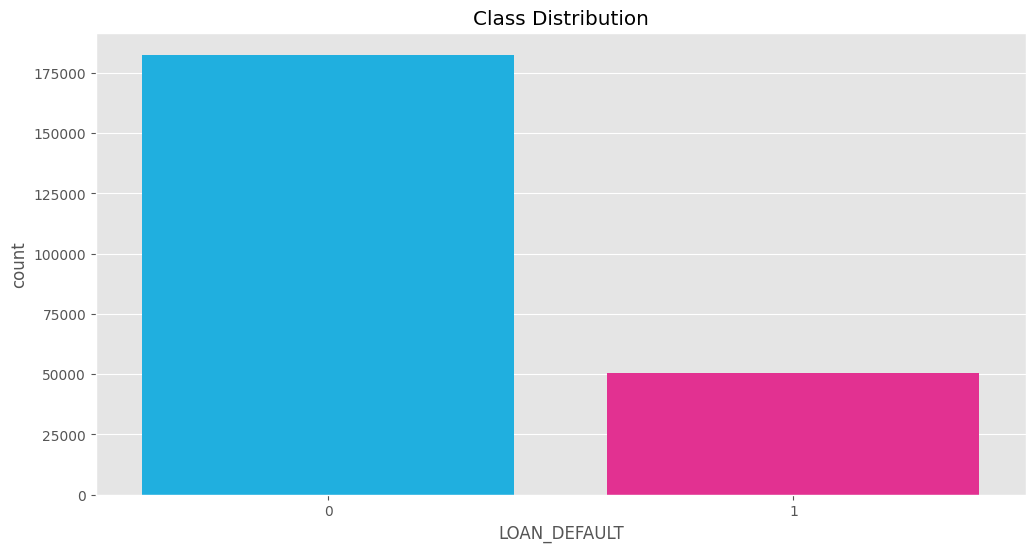

% of no defaults       : 78.29288796246257
Number of no defaults     : 182543
% of defaults         : 21.70711203753742
Number of defaults    : 50611


In [19]:
#Graph
my_pal = {'0': 'deepskyblue', '1': 'deeppink'}

plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'LOAN_DEFAULT', data = train, palette = my_pal)
plt.title('Class Distribution')
plt.show()

# Count and %
Count_Normal_transacation = len(train[train['LOAN_DEFAULT']==0])
Count_Fraud_transacation = len(train[train['LOAN_DEFAULT']==1]) 
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of no defaults       :', Percentage_of_Normal_transacation*100)
print('Number of no defaults     :', Count_Normal_transacation)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of defaults         :',Percentage_of_Fraud_transacation*100)
print('Number of defaults    :', Count_Fraud_transacation)

### Flag : Uneven class

In [20]:
print("Employment type\n")
print(train.groupby(["EMPLOYMENT_TYPE"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Mobile Flag\n")
print(train.groupby(["MOBILENO_AVL_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Aadhar Flag\n")
print(train.groupby(["AADHAR_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Pan Flag\n")
print(train.groupby(["PAN_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Voter ID Flag\n")
print(train.groupby(["VOTERID_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Driving L Flag\n")
print(train.groupby(["DRIVING_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Passport\n")
print(train.groupby(["PASSPORT_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))

Employment type

EMPLOYMENT_TYPE  LOAN_DEFAULT
Missing          0               0.785407
                 1               0.214593
Salaried         0               0.796542
                 1               0.203458
Self employed    0               0.772343
                 1               0.227657
Name: proportion, dtype: float64
##############

Mobile Flag

MOBILENO_AVL_FLAG  LOAN_DEFAULT
1                  0               0.782929
                   1               0.217071
Name: proportion, dtype: float64
##############

Aadhar Flag

AADHAR_FLAG  LOAN_DEFAULT
0            0               0.743594
             1               0.256406
1            0               0.790403
             1               0.209597
Name: proportion, dtype: float64
##############

Pan Flag

PAN_FLAG  LOAN_DEFAULT
0         0               0.783170
          1               0.216830
1         0               0.779978
          1               0.220022
Name: proportion, dtype: float64
##############

Voter ID

In [21]:

print(train.groupby(["LOAN_DEFAULT","EMPLOYMENT_TYPE","AADHAR_FLAG","PAN_FLAG","DRIVING_FLAG","PASSPORT_FLAG"]).VOTERID_FLAG.value_counts(normalize=False))
print("##############\n")


LOAN_DEFAULT  EMPLOYMENT_TYPE  AADHAR_FLAG  PAN_FLAG  DRIVING_FLAG  PASSPORT_FLAG  VOTERID_FLAG
0             Missing          0            0         0             0              1                 451
                                                                    1              0                  10
                                                      1             0              0                  44
                                                                                   1                   4
                                            1         0             0              1                  16
                                                                                   0                   1
                                                      1             0              0                   1
                               1            0         0             0              0                5315
                                                                

In [22]:
train_0 = train[train["LOAN_DEFAULT"]==0]
train_1 = train[train["LOAN_DEFAULT"]==1]

 <a id="5"></a>
    
<font size="+2" color="indigo"><b>3.2 Default vs Disbursal date</b></font><br>


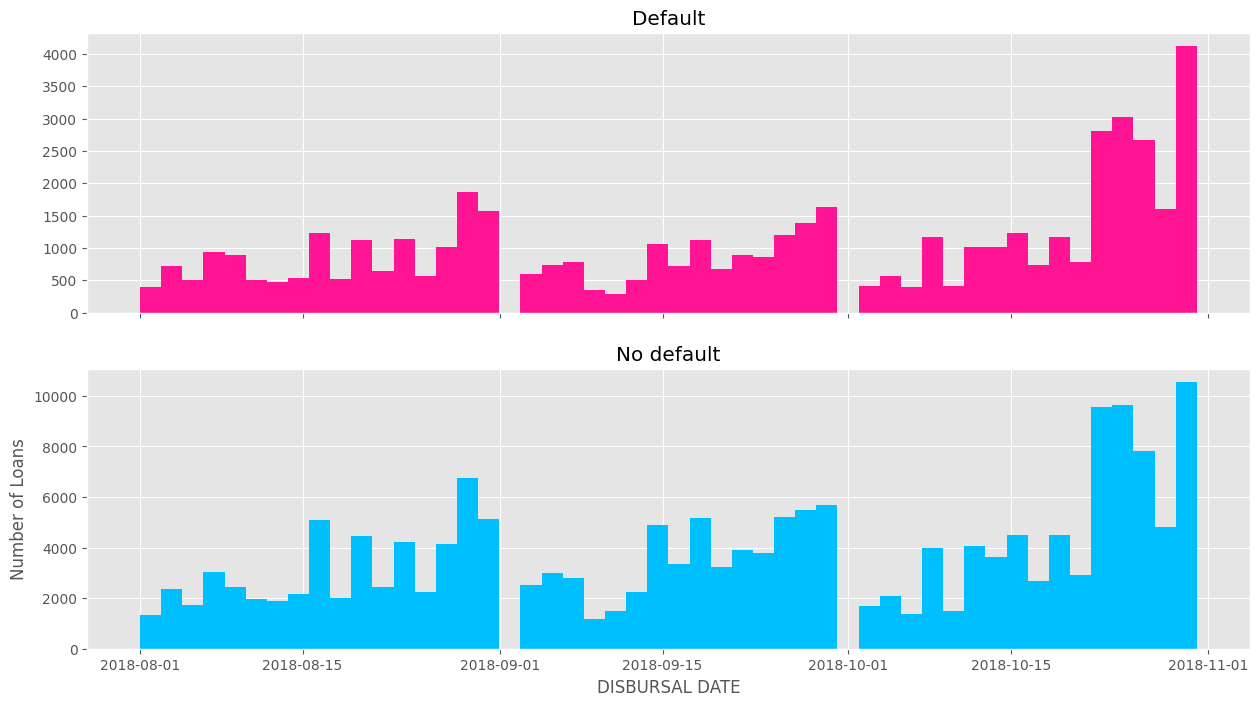

In [23]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))

bins = 50

ax1.hist(train.DISBURSAL_DATE[train.LOAN_DEFAULT == 1], bins = bins, color = 'deeppink')
ax1.set_title('Default')

ax2.hist(train.DISBURSAL_DATE[train.LOAN_DEFAULT == 0], bins = bins, color = 'deepskyblue')
ax2.set_title('No default')

plt.xlabel('DISBURSAL DATE')
plt.ylabel('Number of Loans')
plt.show()

 <a id="6"></a>
    
<font size="+2" color="indigo"><b>3.3 Univariate analysis</b></font><br>


In [24]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()
    
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = train.loc[train['LOAN_DEFAULT'] != 0]
    t0 = train.loc[train['LOAN_DEFAULT'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="LOAN_DEFAULT = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="LOAN_DEFAULT = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [25]:
def plot_bar_comp(var,nrow=2):
    
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.countplot(train[feature])
        sns.countplot(train[feature])
        plt.ylabel('Count plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();
    

In [26]:
# Box Plot for one feature
def plot_box(feature, color):
    plt.figure(figsize=(10,6))
    plt.title("Box Plot of %s" % feature)
    sns.boxplot(train[feature].dropna(),color=color)
    plt.show()


In [27]:
# Bar Plot for one feature
def plot_bar(feature):
    plt.figure(figsize=(10,50))
    sns.catplot(y=feature, hue="LOAN_DEFAULT", kind="count",
            palette="pastel", edgecolor=".6",
            data=train);

### Let's look into variables with high importance
### Loan information

###  'DISBURSED_AMOUNT' : Amount of Loan disbursed

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64


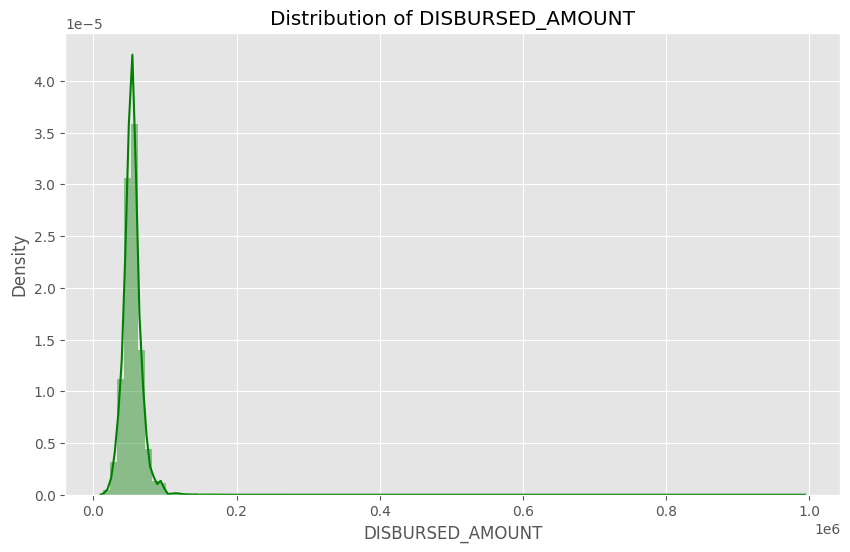

In [28]:
print(train.DISBURSED_AMOUNT.describe())
plot_distribution('DISBURSED_AMOUNT','green')


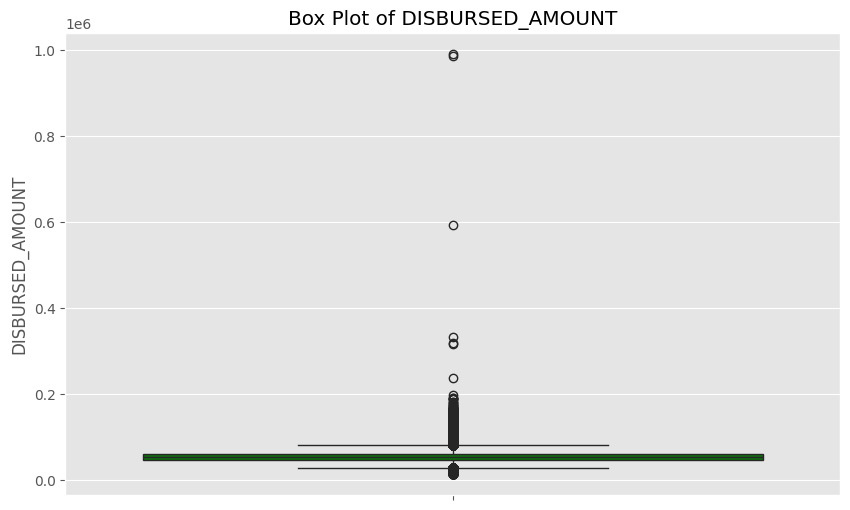

In [29]:
plot_box("DISBURSED_AMOUNT", "green")

#### Since there are outliers - either we can treat outliers or do the binning
#### Here, we have the liberty of performing both and comparing their results

 <a id="7"></a>
    
<font size="+2" color="indigo"><b>3.4 Outlier Treatment </b></font><br>


In [30]:
#Number of observations in column
obs = len(train.DISBURSED_AMOUNT)
print("No. of observations in column: ",obs)

# calculate summary statistics
data_mean, data_std = mean(train.DISBURSED_AMOUNT), std(train.DISBURSED_AMOUNT)
print('Statistics: Mean=%.3f, Std dev=%.3f' % (data_mean, data_std))
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in train.DISBURSED_AMOUNT if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

No. of observations in column:  233154
Statistics: Mean=54356.994, Std dev=12971.286
Identified outliers: 3076


In [31]:
def impute_outlier(x):
    if x <= lower:
        return(data_mean)
    elif x>= (upper):
        return(data_mean)
    else:
        return(x)
train["DISBURSED_AMOUNT_new"]= train["DISBURSED_AMOUNT"].apply(impute_outlier)
print("No. of observations in column: ",len(train.DISBURSED_AMOUNT_new))

No. of observations in column:  233154


### Binning
#### mean      54356.993528
#### std       12971.314171
#### min       13320.000000
#### 25%       47145.000000
#### 50%       53803.000000
#### 75%       60413.000000
#### max      990572.000000

In [32]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
train['DISBURSED_AMOUNT_bins'] = pd.qcut(train['DISBURSED_AMOUNT'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
train['DISBURSED_AMOUNT_bins'].value_counts()


DISBURSED_AMOUNT_bins
Medium     58676
Low        58537
Extreme    58207
High       57734
Name: count, dtype: int64

<Figure size 1000x5000 with 0 Axes>

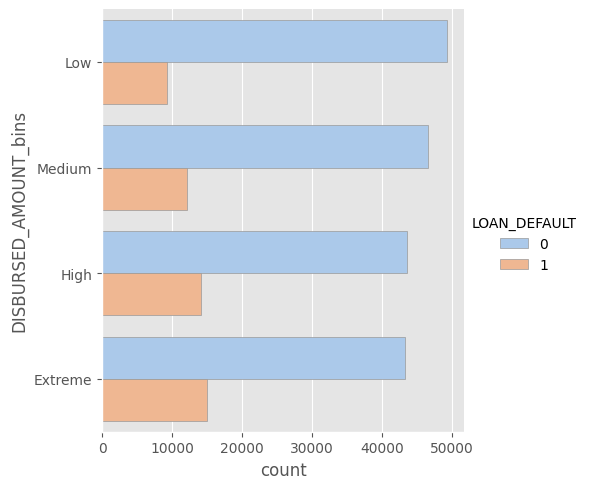

In [33]:
plot_bar("DISBURSED_AMOUNT_bins")

### 'ASSET_COST' : Payment default in the first EMI on due date

count             233154.0
mean     75865.06814380195
std      18944.78128866533
min                37000.0
25%                65717.0
50%                70946.0
75%               79201.75
max              1628992.0
Name: ASSET_COST, dtype: object


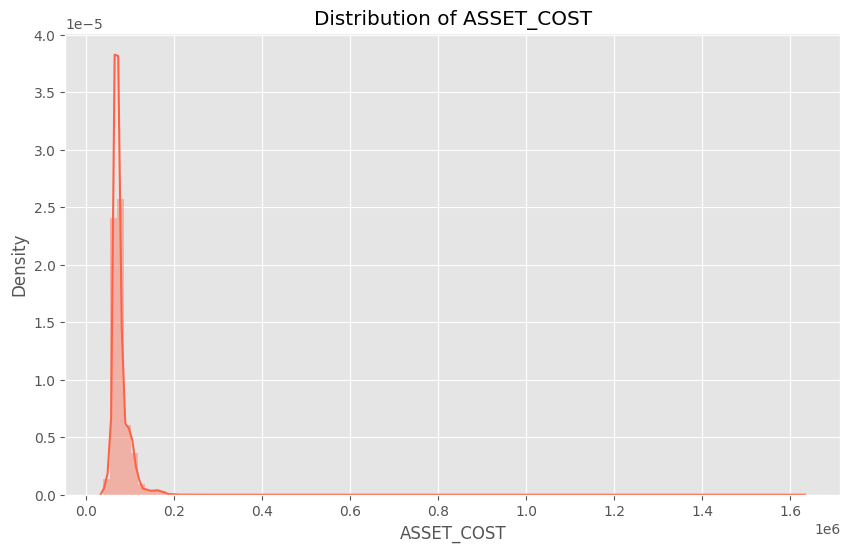

In [34]:
print(train.ASSET_COST.describe().astype(str))
plot_distribution('ASSET_COST','tomato')

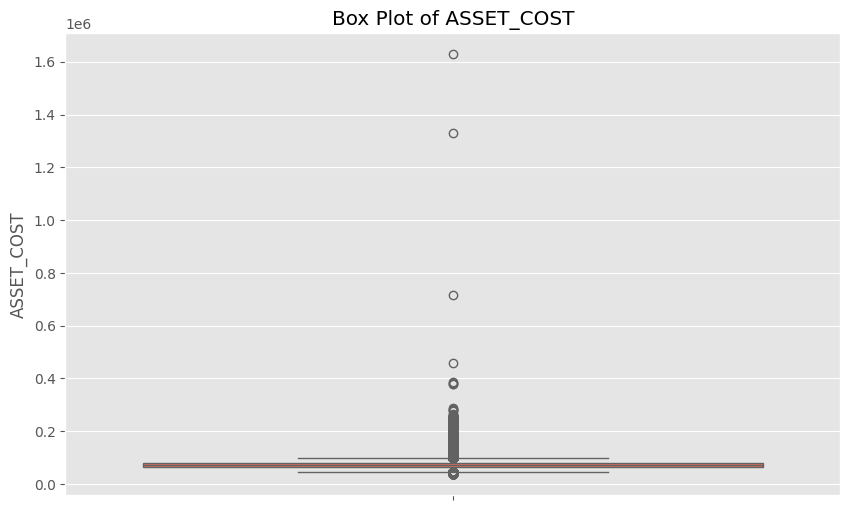

In [35]:
plot_box("ASSET_COST", "tomato")

In [36]:
#Number of observations in column
def outlier_data(df, feature):
    #Number of observations in column
    obs = len(df[feature])
    print("No. of observations in column: ",obs)

    # calculate summary statistics
    data_mean, data_std = mean(df[feature]), std(df[feature])
    print('Statistics: Mean=%.3f, Std dev=%.3f' % (data_mean, data_std))
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in df[feature] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))

def impute_outlier(x):
    if x <= lower:
        return(data_mean)
    elif x>= (upper):
        return(data_mean)
    else:
        return(x)

    


In [37]:
outlier_data(train,"ASSET_COST")

No. of observations in column:  233154
Statistics: Mean=75865.068, Std dev=18944.741
Identified outliers: 4425


In [38]:
train["ASSET_COST_new"]= train["ASSET_COST"].apply(impute_outlier)
print("No. of observations in column: ",len(train.DISBURSED_AMOUNT_new))
outlier_data(train,"ASSET_COST_new")

No. of observations in column:  233154
No. of observations in column:  233154
Statistics: Mean=68018.188, Std dev=9598.448
Identified outliers: 60


### Binning
#### mean     75865.06814380195
#### std      18944.78128866517
#### min                37000.0
#### 25%                65717.0
#### 50%                70946.0
#### 75%               79201.75
#### max              1628992.0

In [39]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
train['ASSET_COST_bins'] = pd.qcut(train['ASSET_COST'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
train['ASSET_COST_bins'].value_counts()

ASSET_COST_bins
Low        58290
Extreme    58289
Medium     58288
High       58287
Name: count, dtype: int64

<Figure size 1000x5000 with 0 Axes>

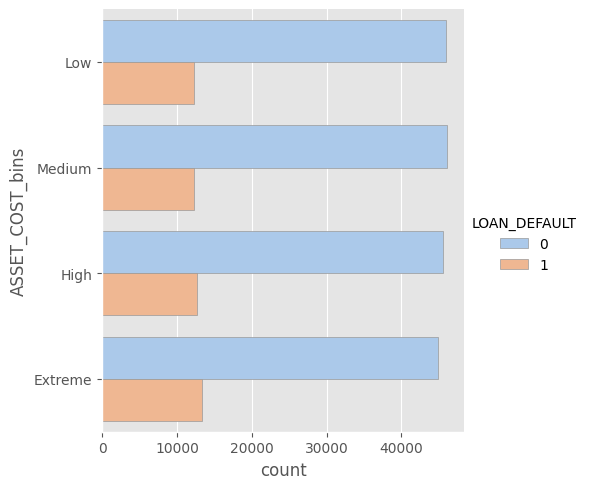

In [40]:
plot_bar("ASSET_COST_bins")

### LTV

count              233154.0
mean      74.74653001878589
std      11.456635738792569
min                   10.03
25%                   68.88
50%                    76.8
75%                   83.67
max                    95.0
Name: LTV, dtype: object


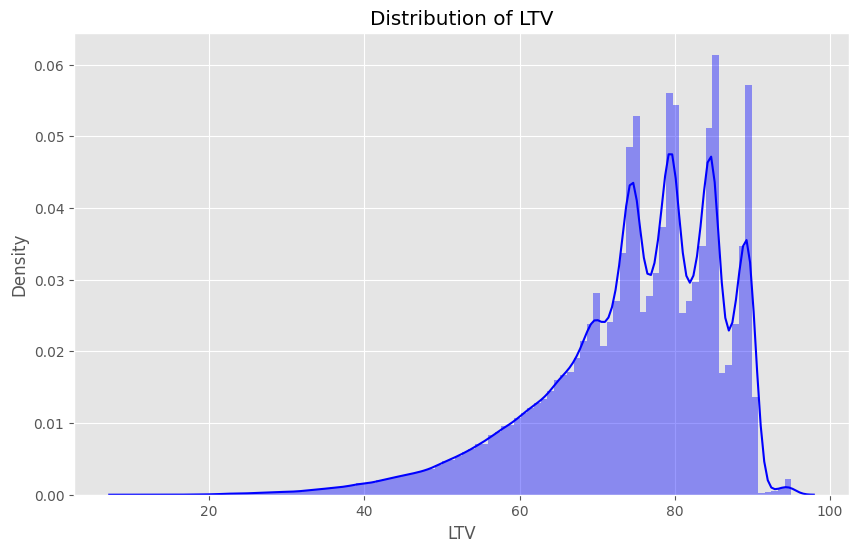

In [41]:
print(train.LTV.describe().astype(str))
plot_distribution('LTV','blue')


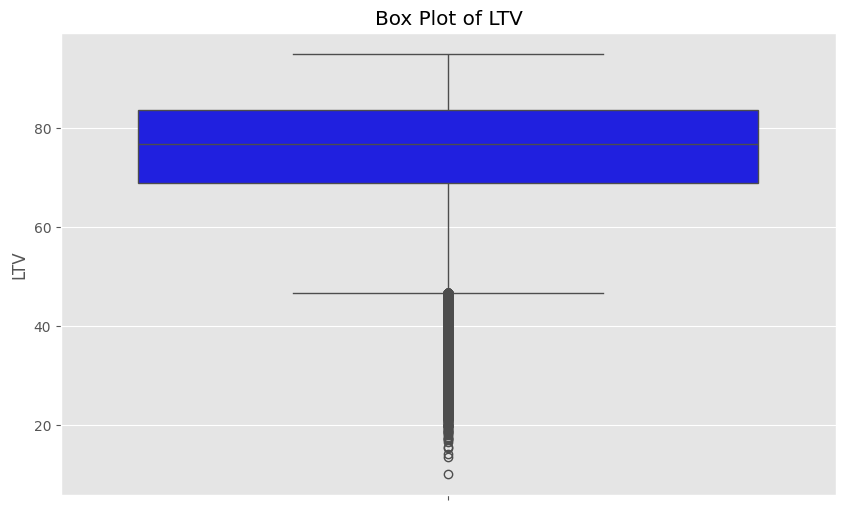

In [42]:

plot_box("LTV", "blue")


In [43]:
outlier_data(train,"LTV")

No. of observations in column:  233154
Statistics: Mean=74.747, Std dev=11.457
Identified outliers: 2745


In [44]:
train["LTV_new"]= train["LTV"].apply(impute_outlier)
print("No. of observations in column: ",len(train.LTV_new))
outlier_data(train,"LTV_new")

No. of observations in column:  233154
No. of observations in column:  233154
Statistics: Mean=54356.994, Std dev=0.000
Identified outliers: 0


### Binning
#### mean      74.74653001879038
#### std      11.456635738792304
#### min                   10.03
#### 25%                   68.88
#### 50%                    76.8
#### 75%                   83.67
#### max                    95.0

In [45]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
train['LTV_bins'] = pd.qcut(train['LTV'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
train['LTV_bins'].value_counts()


LTV_bins
Low        58303
Medium     58299
High       58285
Extreme    58267
Name: count, dtype: int64

<Figure size 1000x5000 with 0 Axes>

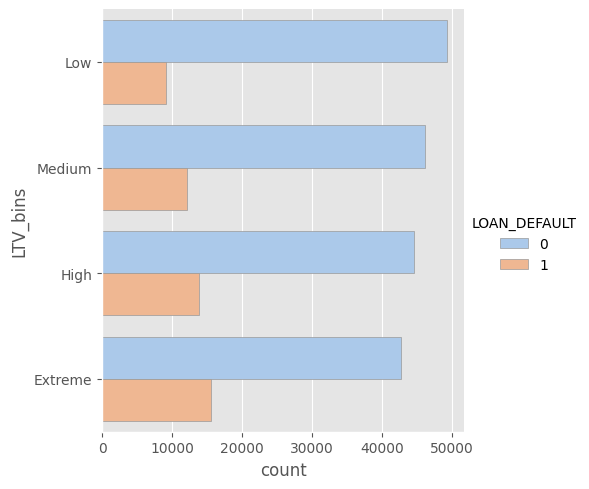

In [46]:
plot_bar("LTV_bins")


### 'PERFORM_CNS_SCORE': Bureau Score


count              233154.0
mean     289.46299441570807
std      338.37477900845766
min                     0.0
25%                     0.0
50%                     0.0
75%                   678.0
max                   890.0
Name: PERFORM_CNS_SCORE, dtype: object


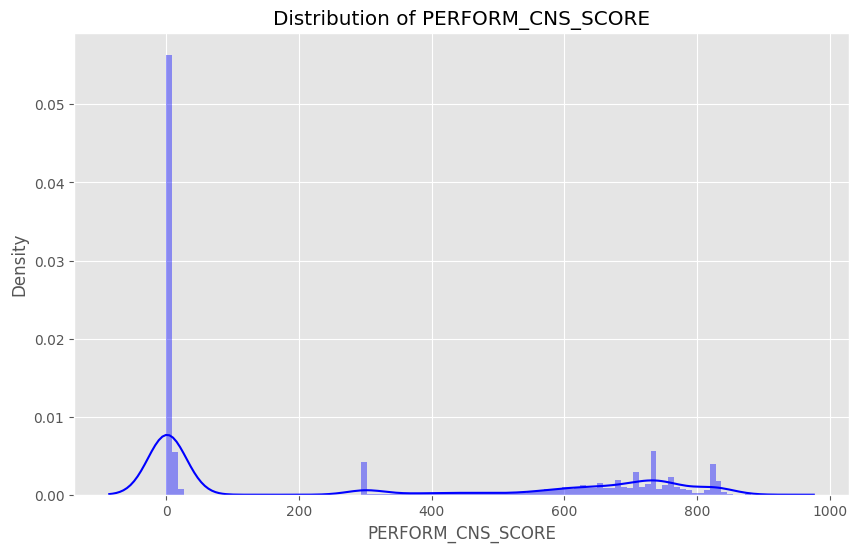

In [47]:
print(train.PERFORM_CNS_SCORE.describe().astype(str))
plot_distribution('PERFORM_CNS_SCORE','blue')


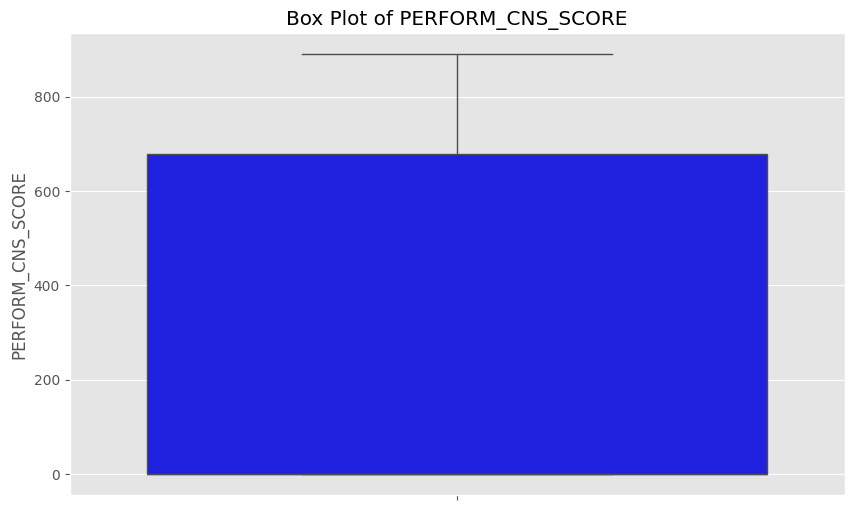

In [48]:
plot_box("PERFORM_CNS_SCORE", "blue")

In [49]:
outlier_data(train,"PERFORM_CNS_SCORE")

No. of observations in column:  233154
Statistics: Mean=289.463, Std dev=338.374
Identified outliers: 0


In [50]:

bin_labels = ["No History",'Very Low', "Low" ,'Medium', 'High']
cut_bins = [-1,10,150, 350, 650, 1000]

train['PERFORM_CNS_SCORE_bins'] = pd.cut(train['PERFORM_CNS_SCORE'],
                              bins=cut_bins,
                              labels=bin_labels)
train['PERFORM_CNS_SCORE_bins'].value_counts()


PERFORM_CNS_SCORE_bins
No History    116950
High           65034
Medium         28425
Very Low       12835
Low             9910
Name: count, dtype: int64

<Figure size 1000x5000 with 0 Axes>

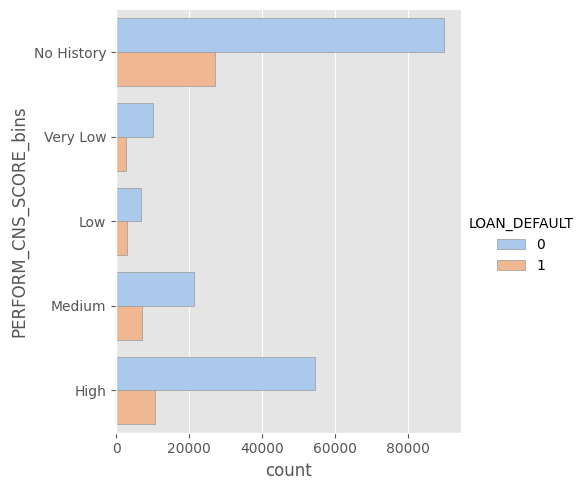

In [51]:
plot_bar("PERFORM_CNS_SCORE_bins")

In [52]:
train.groupby(["PERFORM_CNS_SCORE_DESCRIPTION"]).PERFORM_CNS_SCORE_bins.value_counts()

PERFORM_CNS_SCORE_DESCRIPTION                            PERFORM_CNS_SCORE_bins
A-Very Low Risk                                          High                       14124
                                                         No History                     0
                                                         Very Low                       0
                                                         Low                            0
                                                         Medium                         0
B-Very Low Risk                                          High                        9201
                                                         No History                     0
                                                         Very Low                       0
                                                         Low                            0
                                                         Medium                         0
C-Very Low Risk     

### PERFORM_CNS_SCORE_DESCRIPTION

In [53]:
train.PERFORM_CNS_SCORE_DESCRIPTION.value_counts()

PERFORM_CNS_SCORE_DESCRIPTION
No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the c

In [54]:
g = train.groupby("PERFORM_CNS_SCORE_DESCRIPTION")['LOAN_DEFAULT']
gg = pd.concat([g.value_counts(), 
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
print (gg)

#train.groupby("PERFORM_CNS_SCORE_DESCRIPTION").LOAN_DEFAULT.value_counts(normalize=False)

                                                                 counts  percentage
PERFORM_CNS_SCORE_DESCRIPTION                      LOAN_DEFAULT                    
A-Very Low Risk                                    0              11783   83.425375
                                                   1               2341   16.574625
B-Very Low Risk                                    0               7993   86.870992
                                                   1               1208   13.129008
C-Very Low Risk                                    0              13275   82.736055
                                                   1               2770   17.263945
D-Very Low Risk                                    0               9659   85.041381
                                                   1               1699   14.958619
E-Low Risk                                         0               4821   82.820821
                                                   1               1000   17

### PRI_NO_OF_ACCTS : count of total loans taken by the customer at the time of disbursement


count              233154.0
mean     2.4406358029456925
std      5.2172330215741844
min                     0.0
25%                     0.0
50%                     0.0
75%                     3.0
max                   453.0
Name: PRI_NO_OF_ACCTS, dtype: object


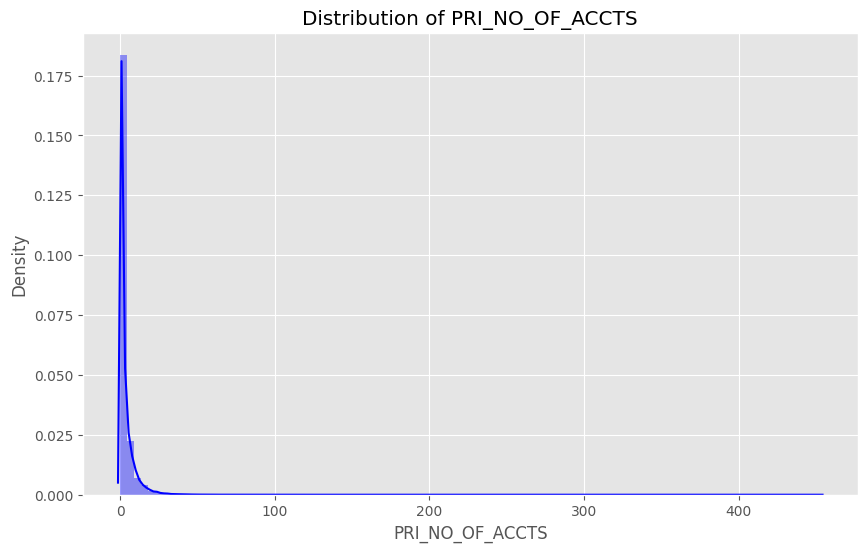

In [55]:
print(train.PRI_NO_OF_ACCTS .describe().astype(str))
plot_distribution('PRI_NO_OF_ACCTS','blue')


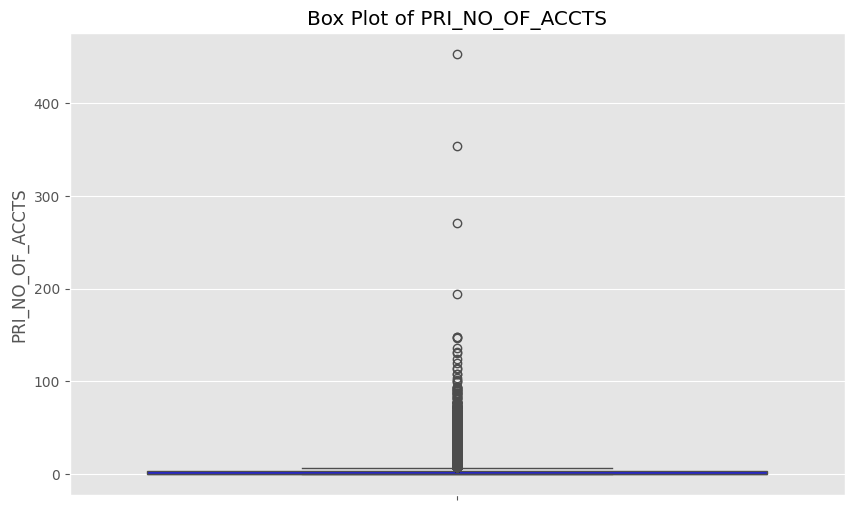

In [56]:
plot_box("PRI_NO_OF_ACCTS", "blue")

In [57]:
outlier_data(train,"PRI_NO_OF_ACCTS")

No. of observations in column:  233154
Statistics: Mean=2.441, Std dev=5.217
Identified outliers: 4119


In [58]:
train["PRI_NO_OF_ACCTS_new"]= train["PRI_NO_OF_ACCTS"].apply(impute_outlier)
outlier_data(train,"PRI_NO_OF_ACCTS_new")


No. of observations in column:  233154
Statistics: Mean=54356.994, Std dev=0.000
Identified outliers: 0


In [59]:

bin_labels = ["One",'More than One']
cut_bins = [-1,1, 1000]

train['PRI_NO_OF_ACCTS_bins'] = pd.cut(train['PRI_NO_OF_ACCTS'],
                              bins=cut_bins,
                              labels=bin_labels)
train['PRI_NO_OF_ACCTS_bins'].value_counts()

PRI_NO_OF_ACCTS_bins
One              151928
More than One     81226
Name: count, dtype: int64

<Figure size 1000x5000 with 0 Axes>

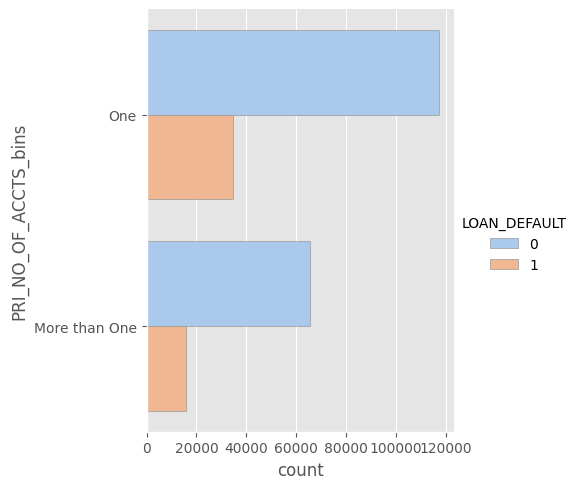

In [60]:
plot_bar("PRI_NO_OF_ACCTS_bins")

### PRI_OVERDUE_ACCTS: count of default accounts at the time of disbursement


count               233154.0
mean     0.15654889043293274
std       0.5487867498775106
min                      0.0
25%                      0.0
50%                      0.0
75%                      0.0
max                     25.0
Name: PRI_OVERDUE_ACCTS, dtype: object


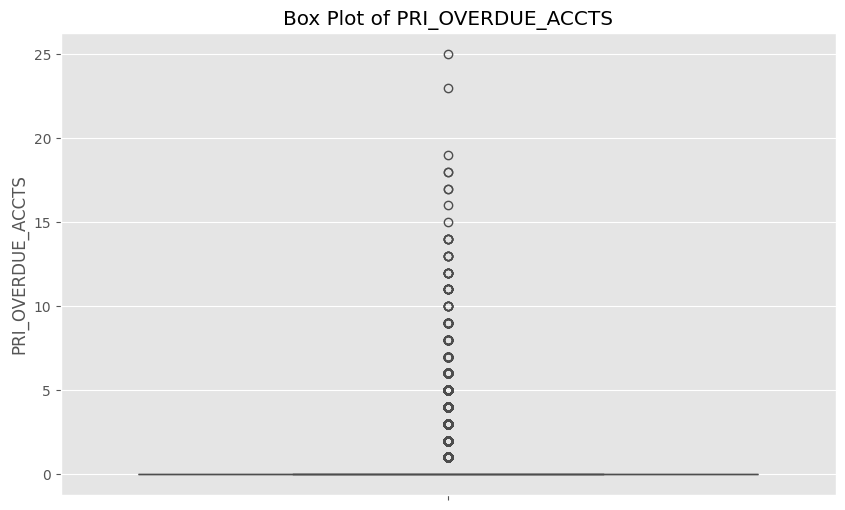

In [61]:
print(train.PRI_OVERDUE_ACCTS.describe().astype(str))
plot_box("PRI_OVERDUE_ACCTS", "blue")

In [62]:
outlier_data(train,"PRI_OVERDUE_ACCTS")


No. of observations in column:  233154
Statistics: Mean=0.157, Std dev=0.549
Identified outliers: 6305


In [63]:
train["PRI_OVERDUE_ACCTS_new"]= train["PRI_OVERDUE_ACCTS"].apply(impute_outlier)
outlier_data(train,"PRI_OVERDUE_ACCTS_new")


No. of observations in column:  233154
Statistics: Mean=54356.994, Std dev=0.000
Identified outliers: 0


In [64]:
bin_labels = ["None",'One (or more)']
cut_bins = [-1,0, 1000]

train['PRI_OVERDUE_ACCTS_bins'] = pd.cut(train['PRI_OVERDUE_ACCTS'],
                              bins=cut_bins,
                              labels=bin_labels)
train['PRI_OVERDUE_ACCTS_bins'].value_counts()

PRI_OVERDUE_ACCTS_bins
None             206879
One (or more)     26275
Name: count, dtype: int64

<Figure size 1000x5000 with 0 Axes>

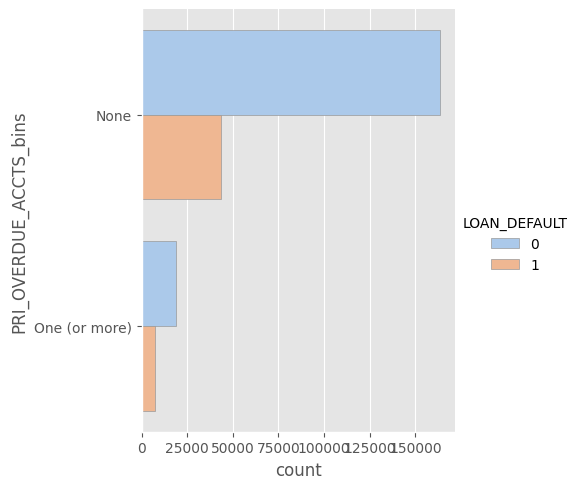

In [65]:
plot_bar("PRI_OVERDUE_ACCTS_bins")

## Let's look into data with lesser importance
#### MOBILENO_AVL_FLAG : if Mobile no. was shared by the customer then flagged as 1
#### AADHAR_FLAG : if aadhar was shared by the customer then flagged as 1
#### PAN_FLAG : if pan was shared by the customer then flagged as 1
#### VOTERID_FLAG : if voter  was shared by the customer then flagged as 1
#### PASSPORT_FLAG : if DL was shared by the customer then flagged as 1
#### DRIVING_FLAG : if passport was shared by the customer then flagged as 1

In [66]:
var = ['MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'PASSPORT_FLAG', 'DRIVING_FLAG']
plot_bar_comp(var,nrow=3)

KeyboardInterrupt: 

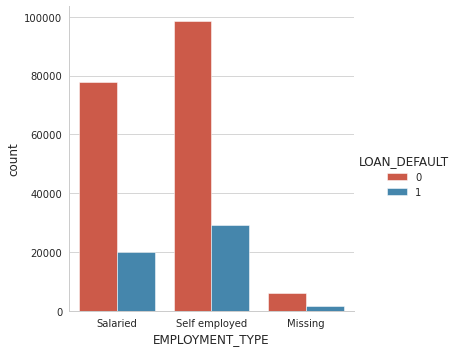

In [ ]:
# Employment Type
sns.catplot(data=train,kind='count',x='EMPLOYMENT_TYPE',hue='LOAN_DEFAULT')

## Age is in days

In [ ]:
now = pd.Timestamp('now')
#train['DATE_OF_BIRTH'] = train['DATE_OF_BIRTH'].where(train['DATE_OF_BIRTH'] < now, train['DATE_OF_BIRTH'] -  np.timedelta64(100, 'Y'))   
train['age'] = (now - train['DATE_OF_BIRTH'])  

train['age']= train['age'].astype(str)
train[['age','age_waste']] = train['age'].str.split("days",expand=True)
train['age']= train['age'].astype(str).astype(int)
train= train.drop(columns= ['age_waste'])

print(train['age'].head())

0    13424
1    12847
2    12823
3     9773
4    15638
Name: age, dtype: int64


In [ ]:
train['disbursal_time'] = (now - train['DISBURSAL_DATE'])  

train['disbursal_time']= train['disbursal_time'].astype(str)
train[['disbursal_time','disbursal_time_waste']] = train['disbursal_time'].str.split("days",expand=True)
train['disbursal_time']= train['disbursal_time'].astype(str).astype(int)
train= train.drop(columns= ['disbursal_time_waste'])

print(train['disbursal_time'].head())

0    791
1    737
2    793
3    707
4    737
Name: disbursal_time, dtype: int64


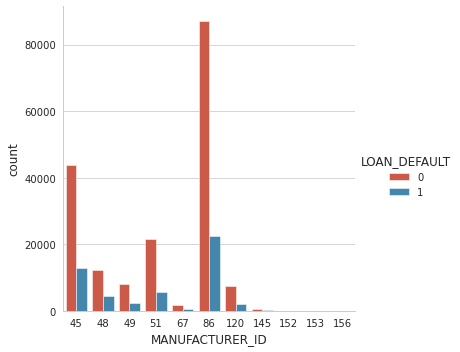

In [ ]:
# MANUFACTURER_ID
sns.catplot(data=train,kind='count',x='MANUFACTURER_ID',hue='LOAN_DEFAULT')

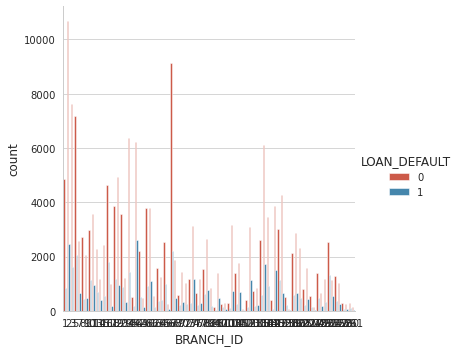

In [ ]:
sns.catplot(data=train,kind='count',x='BRANCH_ID',hue='LOAN_DEFAULT')

#### Let's see the new columns along with the less important continous variables

<Figure size 432x288 with 0 Axes>

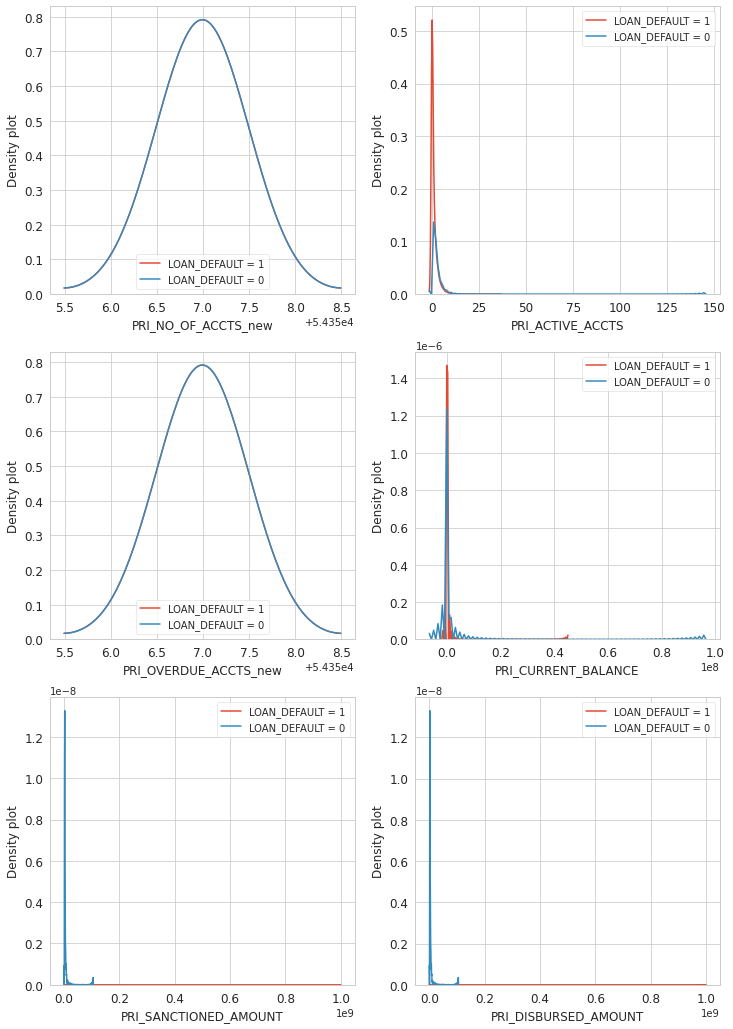

In [ ]:
var = ['PRI_NO_OF_ACCTS_new', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS_new', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT']
plot_distribution_comp(var,nrow=3)

<Figure size 432x288 with 0 Axes>

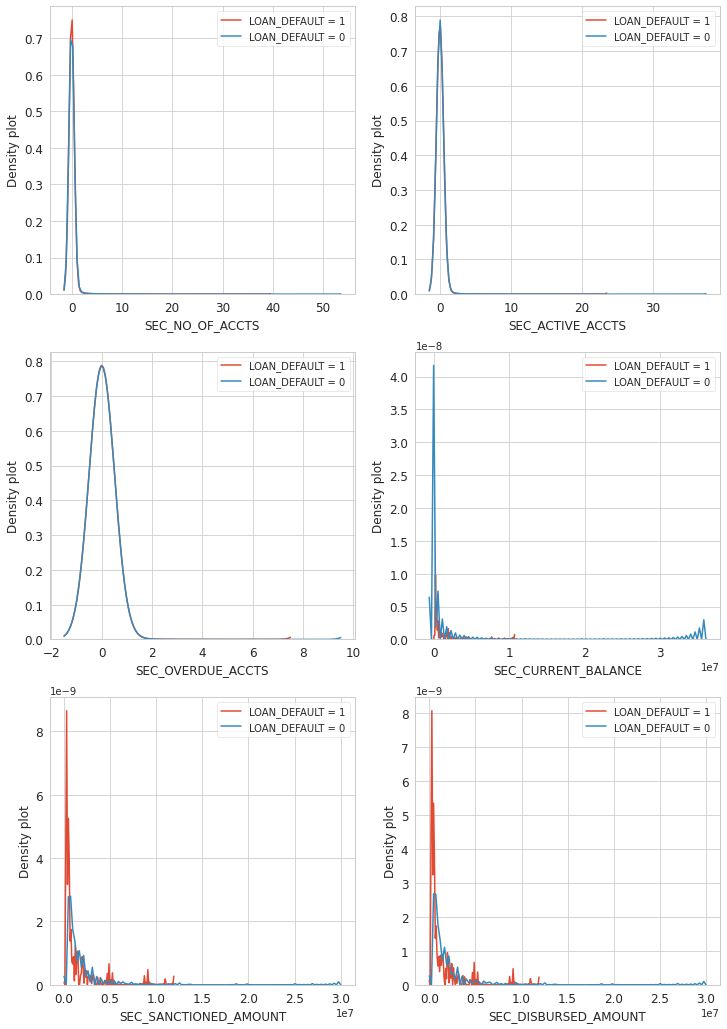

In [ ]:
var = ['SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT']
plot_distribution_comp(var,nrow=3)

 <a id="8"></a>
    
<font size="+2" color="indigo"><b>3.5 Feature Selection</b></font><br>



In [ ]:
#Useless features
#train = train.drop(['DISBURSED_AMOUNT','ASSET_COST', 'LTV', 'PRI_NO_OF_ACCTS','PRI_OVERDUE_ACCTS', 'DATE_OF_BIRTH', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID','BRANCH_ID'],axis=1)
train = train.drop([ 'DATE_OF_BIRTH' , 'STATE_ID', 'EMPLOYEE_CODE_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID','BRANCH_ID'],axis=1)

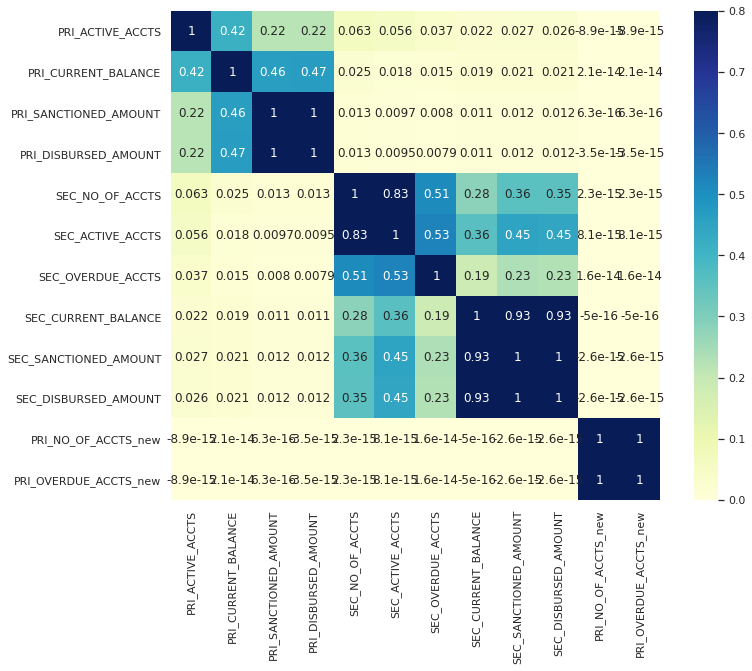

In [ ]:
#Highly Correlated
sns.set()

cols = train[['PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 
              'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
              'SEC_DISBURSED_AMOUNT',  'PRI_NO_OF_ACCTS_new', 'PRI_OVERDUE_ACCTS_new']]
corr = cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');


#### Not highly correlated with anyone: 'PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE','PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT','SEC_OVERDUE_ACCTS'
#### 'PRI_NO_OF_ACCTS_new', 'PRI_OVERDUE_ACCTS_new'are perfectly positively correlated and hence keeping one 
#### 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS' are highly positively correlated, hence keeping one
####  'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT' are highly positively correlated, hence keeping one



In [ ]:
# train = train.drop(['PRI_OVERDUE_ACCTS_new','SEC_ACTIVE_ACCTS','SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT' ],axis=1)

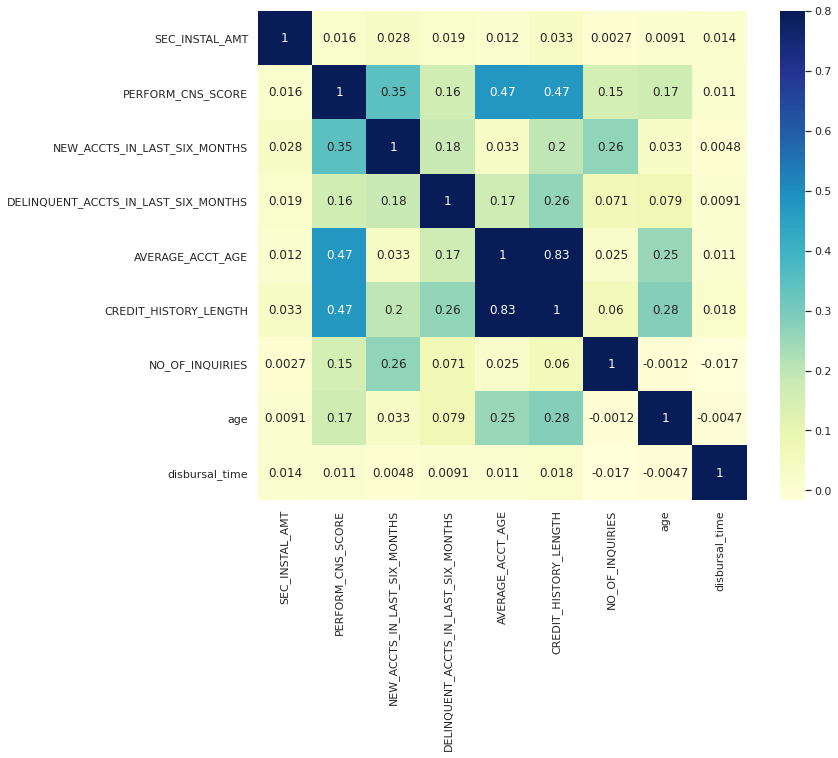

In [ ]:
#Highly Correlated
sns.set()

cols = train[['SEC_INSTAL_AMT', 'PERFORM_CNS_SCORE','NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 
              'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES','age', 'disbursal_time']]
corr = cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');

#### 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH'are highly positively correlated and hence keeping one

In [ ]:
#train = train.drop(['AVERAGE_ACCT_AGE' ],axis=1)

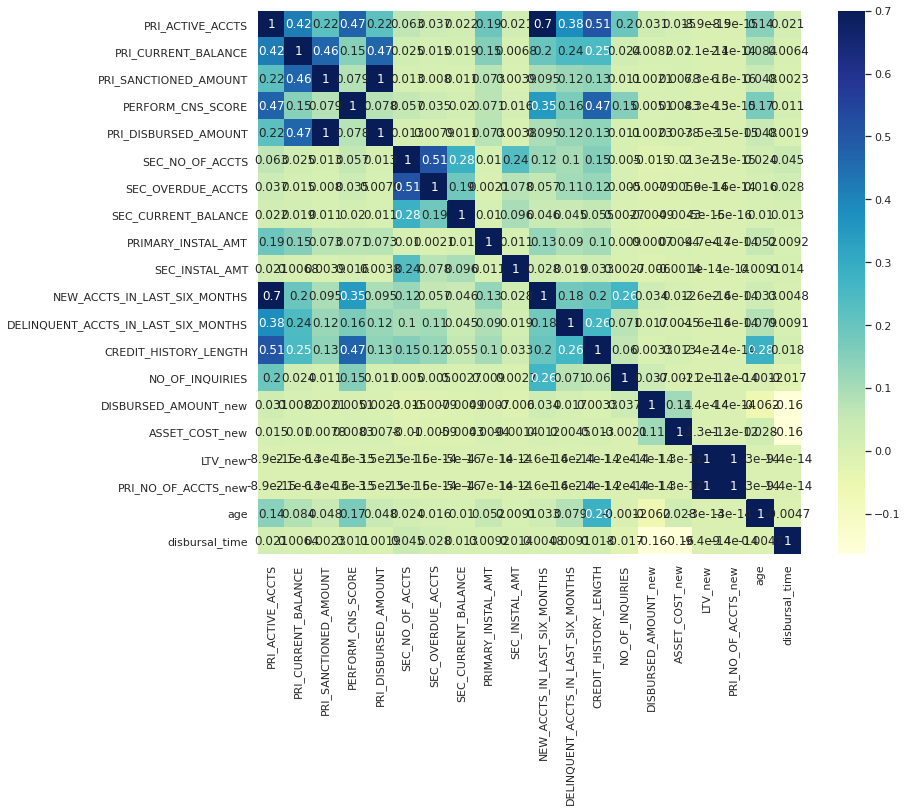

In [ ]:
#Highly Correlated
sns.set()

cols = train[['PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PERFORM_CNS_SCORE',
              'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
              'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 
              'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
              'DISBURSED_AMOUNT_new','ASSET_COST_new','LTV_new','PRI_NO_OF_ACCTS_new','age', 'disbursal_time']]
corr = cols.corr()
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corr, annot=True, vmax=.7, square=True,cmap = 'YlGnBu');

#### One out of 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT' 
#### One out of 'LTV_new', 'PRI_NO_OF_ACCTS_new'
#### Eliminate 'NEW_ACCTS_IN_LAST_SIX_MONTHS'

In [ ]:
#train = train.drop(['PRI_SANCTIONED_AMOUNT','PRI_NO_OF_ACCTS_new','NEW_ACCTS_IN_LAST_SIX_MONTHS'],axis=1)

### Preparing Datasets 1) Binned Variables 2) Continous variables

In [ ]:
train_con = train[['EMPLOYMENT_TYPE', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
                   'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 
                   'PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 
                   'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 
                   'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
                   'LOAN_DEFAULT', 'DISBURSED_AMOUNT_new', 'ASSET_COST_new', 
                   'LTV_new', 'age', 'disbursal_time']]

In [ ]:
train_bin = train [['UNIQUEID', 'EMPLOYMENT_TYPE', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 
                    'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 
                    'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE',
                    'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
                    'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 
                    'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT',
                    'DISBURSED_AMOUNT_bins', 'ASSET_COST_bins', 'LTV_bins',
                    'PERFORM_CNS_SCORE_bins', 'PRI_NO_OF_ACCTS_bins', 'PRI_OVERDUE_ACCTS_bins', 'age', 'disbursal_time']]

In [ ]:
# Confusion Matrix

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Precision, Recall, F1 Score
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

In [ ]:
# Precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

In [ ]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

In [ ]:
#feature importance plot
def plot_feature_importance(model):
    tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (15,8))
    plt.title('Features importance',fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()


 <a id="9"></a>
    
<font size="+2" color="indigo"><b>3.5.1 Standardization of data</b></font><br>



In [ ]:
scaler_data = StandardScaler() 
def scaleColumns(df, cols_to_scale):

    for col in cols_to_scale:

        df[col] = pd.DataFrame(scaler_data.fit_transform(pd.DataFrame(train_con[col])),columns=[col])

    return df

In [ ]:
scaled_df = scaleColumns(train_con,['PERFORM_CNS_SCORE','PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 
                                 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS', 
                                 'SEC_CURRENT_BALANCE', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
                                 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH', 
                                 'NO_OF_INQUIRIES', 'DISBURSED_AMOUNT_new',
                                 'ASSET_COST_new', 'LTV_new', 'age', 'disbursal_time'])

scaled_df.head()

,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_ACTIVE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,DISBURSED_AMOUNT_new,ASSET_COST_new,LTV_new,age,disbursal_time
0,Salaried,1,1,0,0,0,0,-0.855453,No Bureau History Available,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,-0.292450,0,-0.282591,-1.002057,-1.0,0.026250,1.880044
1,Self employed,1,1,0,0,0,0,0.911822,I-Medium Risk,-0.020549,-0.146773,-0.070599,-0.094259,-0.065216,-0.031884,-0.073427,-0.020784,2.347632,0.236085,-0.292450,1,-0.589728,-0.257144,-1.0,-0.134554,-0.094516
2,Self employed,1,1,0,0,0,0,-0.855453,No Bureau History Available,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,-0.292450,0,-0.041033,-0.693673,-1.0,-0.141243,1.953176
3,Self employed,1,1,0,0,0,0,0.045917,L-Very High Risk,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086376,-0.020784,-0.253566,-0.043819,1.122986,1,0.337856,-0.198489,-1.0,-0.991244,-1.191493
4,Self employed,1,1,0,0,0,0,-0.855453,No Bureau History Available,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,1.122986,1,-0.121552,-0.804108,-1.0,0.643267,-0.094516


 <a id="10"></a>
    
<font size="+2" color="indigo"><b>3.5.2 Dummy insertion</b></font><br>



In [ ]:
train_dummy = pd.get_dummies(scaled_df, prefix_sep='_', drop_first=True)
train_dummy.head()

,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PRI_ACTIVE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,DISBURSED_AMOUNT_new,ASSET_COST_new,LTV_new,age,disbursal_time,EMPLOYMENT_TYPE_Salaried,EMPLOYMENT_TYPE_Self employed,PERFORM_CNS_SCORE_DESCRIPTION_B-Very Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_C-Very Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_D-Very Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_E-Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_F-Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_G-Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_H-Medium Risk,PERFORM_CNS_SCORE_DESCRIPTION_I-Medium Risk,PERFORM_CNS_SCORE_DESCRIPTION_J-High Risk,PERFORM_CNS_SCORE_DESCRIPTION_K-High Risk,PERFORM_CNS_SCORE_DESCRIPTION_L-Very High Risk,PERFORM_CNS_SCORE_DESCRIPTION_M-Very High Risk,PERFORM_CNS_SCORE_DESCRIPTION_No Bureau History Available,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Sufficient History Not Available
0,1,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,-0.292450,0,-0.282591,-1.002057,-1.0,0.026250,1.880044,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,0,0,0,0,0.911822,-0.020549,-0.146773,-0.070599,-0.094259,-0.065216,-0.031884,-0.073427,-0.020784,2.347632,0.236085,-0.292450,1,-0.589728,-0.257144,-1.0,-0.134554,-0.094516,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,-0.292450,0,-0.041033,-0.693673,-1.0,-0.141243,1.953176,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0.045917,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086376,-0.020784,-0.253566,-0.043819,1.122986,1,0.337856,-0.198489,-1.0,-0.991244,-1.191493,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,1.122986,1,-0.121552,-0.804108,-1.0,0.643267,-0.094516,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
y = train_dummy[['LOAN_DEFAULT']]
X= train_dummy.loc[:, train_dummy.columns != 'LOAN_DEFAULT']
X.shape

(233154, 44)

In [ ]:
np.any(np.isnan(X))

False

In [ ]:
X = X.fillna(0)
X.shape

(233154, 44)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

 <a id="11"></a>
    
<font size="+2" color="indigo"><b>4. Base Line Models</b></font><br>



 <a id="12"></a>
    
<font size="+2" color="indigo"><b>4.1 Logistic Regression</b></font><br>



In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[36464    41]
 [10083    43]]
78.0


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, logpred))
print("F1 Score ",f1_score(y_test, logpred))
print("Recall Score ",recall_score(y_test, logpred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, logpred))

Accuracy of model  0.7828912097102786
F1 Score  0.00842311459353575
Recall Score  0.004246494173414972
Balanced Accuracy Score  0.5015616801780648


Accuracy score is good, however the model is not predicting the Defaults well

 <a id="13"></a>
    
<font size="+2" color="indigo"><b>4.2 Random Forest</b></font><br>



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[35057  1448]
 [ 9405   721]]
77.0


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, rfc_pred))

Accuracy of model  0.7672578327721902
F1 Score  0.11728344855632372
Recall Score  0.0712028441635394
Balanced Accuracy Score  0.5157685224789755


Accuracy score is good, however the model is predicting the Defaults better than Logistic reg


 <a id="14"></a>
    
<font size="+2" color="indigo"><b>4.3 Naive Bayes</b></font><br>



In [ ]:
from sklearn.naive_bayes import GaussianNB

# train model
nb = GaussianNB().fit(X_train, y_train)

# predict on test set
nb_pred = nb.predict(X_test)
print(confusion_matrix(y_test, nb_pred))
print(round(accuracy_score(y_test, nb_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[ 6915 29590]
 [ 1178  8948]]
34.0


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, nb_pred))
print("F1 Score ",f1_score(y_test, nb_pred))
print("Recall Score ",recall_score(y_test, nb_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, nb_pred))

Accuracy of model  0.34018142437434323
F1 Score  0.36774617787276015
Recall Score  0.8836658107841201
Balanced Accuracy Score  0.5365459583984975


Model accuracy is very poor

 <a id="15"></a>
    
<font size="+2" color="indigo"><b>4.4 Stochastic Gradient Descent</b></font><br>


In [ ]:
from sklearn.linear_model import SGDClassifier

# train model
sgd = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 101).fit(X_train, y_train)

# predict on test set
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, sgd_pred))
print(round(accuracy_score(y_test, sgd_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[36478    27]
 [10111    15]]
78.0


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, sgd_pred))
print("F1 Score ",f1_score(y_test, sgd_pred))
print("Recall Score ",recall_score(y_test, sgd_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, sgd_pred))

Accuracy of model  0.7825909802491905
F1 Score  0.002950432730133753
Recall Score  0.0014813351767726645
Balanced Accuracy Score  0.5003708552339143


Accuracy score is good, however the model is not predicting the Defaults well

 <a id="16"></a>
    
<font size="+2" color="indigo"><b>4.5 Decision Tree Classifier</b></font><br>



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

# predict on test set
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[36190   315]
 [ 9951   175]]
78.0


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, dtree_pred))
print("F1 Score ",f1_score(y_test, dtree_pred))
print("Recall Score ",recall_score(y_test, dtree_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, dtree_pred))

Accuracy of model  0.7798460251763848
F1 Score  0.03296910324039186
Recall Score  0.017282243729014417
Balanced Accuracy Score  0.5043266443956673


Accuracy score is good, however the model is not predicting the Defaults well

 <a id="17"></a>
    
<font size="+2" color="indigo"><b>4.6 XG Boost</b></font><br>



In [ ]:
# XG Boost

from xgboost import XGBClassifier

# train model
xgb = XGBClassifier().fit(X_train, y_train)

# predict on test set
xgb_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, xgb_pred))
print(round(accuracy_score(y_test, xgb_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[36280   225]
 [ 9942   184]]
78.0


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, xgb_pred))
print("F1 Score ",f1_score(y_test, xgb_pred))
print("Recall Score ",recall_score(y_test, xgb_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, xgb_pred))

Accuracy of model  0.7819690763655079
F1 Score  0.0349311817750356
Recall Score  0.018171044835078018
Balanced Accuracy Score  0.5060037527969391


Accuracy score is good, however the model is not predicting the Defaults well

## Best model is Random Forest till now

 <a id="18"></a>
    
<font size="+2" color="indigo"><b>5. Dealing with Imbalanced data</b></font><br>



 <a id="19"></a>
    
<font size="+2" color="indigo"><b>5.1 SMOTE</b></font><br>



SMOTE or Synthetic Minority Oversampling Technique is used to create synthetic data. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

In [ ]:
from imblearn.over_sampling import SMOTE


# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [ ]:
from sklearn.linear_model import SGDClassifier

# train model
sgd = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 101).fit(X_train, y_train)

# predict on test set
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, sgd_pred))
print(round(accuracy_score(y_test, sgd_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[20043 25702]
 [ 3898  8646]]
49.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

# predict on test set
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[25128 20617]
 [ 5258  7286]]
56.00000000000001


In [ ]:
from sklearn.datasets import make_classification
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfc, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1284 ± 0.0018,DISBURSED_AMOUNT_new
0.1185 ± 0.0013,disbursal_time
0.1067 ± 0.0008,age
0.1024 ± 0.0011,ASSET_COST_new
0.0622 ± 0.0007,PERFORM_CNS_SCORE
0.0552 ± 0.0009,CREDIT_HISTORY_LENGTH
0.0447 ± 0.0013,PRI_DISBURSED_AMOUNT
0.0439 ± 0.0015,EMPLOYMENT_TYPE_Self employed
0.0423 ± 0.0014,EMPLOYMENT_TYPE_Salaried
0.0409 ± 0.0013,PRI_CURRENT_BALANCE


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, dtree_pred))
print("F1 Score ",f1_score(y_test, dtree_pred))
print("Recall Score ",recall_score(y_test, dtree_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, dtree_pred))

Accuracy of model  0.5560912007411347
F1 Score  0.36027393873464036
Recall Score  0.5808354591836735
Balanced Accuracy Score  0.5650706971292725


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, rfc_pred))

[[38427  7318]
 [ 9700  2844]]
71.0
Accuracy of model  0.708040968278749
F1 Score  0.2505064740597199
Recall Score  0.2267219387755102
Balanced Accuracy Score  0.5333740855753166


### The accuracy of RF might have fone down by 7% but is predicting defaults better now. 

 <a id="20"></a>
    
<font size="+2" color="indigo"><b>5.2 Upsampling</b></font><br>



Upsampling can be defined as adding more copies of the minority class. Upsampling can be a good choice when you don’t have a ton of data to work with. (Not a good choice here though)

In [ ]:
y = train_dummy[['LOAN_DEFAULT']]
X= train_dummy.loc[:, train_dummy.columns != 'LOAN_DEFAULT']
X.shape

(233154, 44)

In [ ]:

from sklearn.utils import resample
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.LOAN_DEFAULT==0]
fraud = X[X.LOAN_DEFAULT==1]

In [ ]:
# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.LOAN_DEFAULT.value_counts()

y_train = upsampled.LOAN_DEFAULT
X_train = upsampled.drop('LOAN_DEFAULT', axis=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

# predict on test set
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[24438 21307]
 [ 5060  7484]]
55.00000000000001


In [ ]:
from sklearn.linear_model import SGDClassifier

# train model
sgd = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 101).fit(X_train, y_train)

# predict on test set
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, sgd_pred))
print(round(accuracy_score(y_test, sgd_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[27410 18335]
 [ 5785  6759]]
59.0


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, sgd_pred))
print("F1 Score ",f1_score(y_test, sgd_pred))
print("Recall Score ",recall_score(y_test, sgd_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, sgd_pred))

Accuracy of model  0.5861997975604316
F1 Score  0.35915829746532757
Recall Score  0.5388233418367347
Balanced Accuracy Score  0.5690072551352217


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, rfc_pred))

[[40603  5142]
 [10507  2037]]
73.0
Accuracy of model  0.731527389387363
F1 Score  0.20656086802210616
Recall Score  0.16238839285714285
Balanced Accuracy Score  0.5249913327276206


 <a id="21"></a>
    
<font size="+2" color="indigo"><b>5.3 Downsampling</b></font><br>



Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set.

In [ ]:
y = train_dummy[['LOAN_DEFAULT']]
X= train_dummy.loc[:, train_dummy.columns != 'LOAN_DEFAULT']
X.shape

(233154, 44)

In [ ]:
#Downsample
from sklearn.utils import resample
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.LOAN_DEFAULT==0]
fraud = X[X.LOAN_DEFAULT==1]

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.LOAN_DEFAULT.value_counts()

y_train = downsampled.LOAN_DEFAULT
X_train = downsampled.drop('LOAN_DEFAULT', axis=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

# predict on test set
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[24438 21307]
 [ 5060  7484]]
55.00000000000001


In [ ]:
from sklearn.linear_model import SGDClassifier

# train model
sgd = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 101).fit(X_train, y_train)

# predict on test set
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, sgd_pred))
print(round(accuracy_score(y_test, sgd_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[28616 17129]
 [ 6244  6300]]
60.0


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, sgd_pred))
print("F1 Score ",f1_score(y_test, sgd_pred))
print("Recall Score ",recall_score(y_test, sgd_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, sgd_pred))

Accuracy of model  0.5990152515912093
F1 Score  0.35026269702276713
Recall Score  0.5022321428571429
Balanced Accuracy Score  0.5638934241447153


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, rfc_pred))

[[40759  4986]
 [10544  2000]]
73.0
Accuracy of model  0.7335689409665631
F1 Score  0.20481310803891448
Recall Score  0.15943877551020408
Balanced Accuracy Score  0.5252216284371438


 <a id="22"></a>
    
<font size="+2" color="indigo"><b>5.4 PCA</b></font><br>



In [ ]:
y = train_dummy[['LOAN_DEFAULT']]
X= train_dummy.loc[:, train_dummy.columns != 'LOAN_DEFAULT']
X.shape

(233154, 44)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA()

In [ ]:
pca.explained_variance_ratio_.astype(str)

array(['0.16265829350708455', '0.09903621412229618',
       '0.07462430773577651', '0.07358981469493193',
       '0.06085225395809804', '0.05492265440885541',
       '0.05417331740690219', '0.05086013982642461',
       '0.04937237829966723', '0.04837174208752734',
       '0.047106943633688336', '0.04568138029630867',
       '0.03079245418613549', '0.027879267610844003',
       '0.02648257217151129', '0.025929758169305275',
       '0.02218006864733731', '0.01366875138810609',
       '0.0037680186256326947', '0.0035460933355692687',
       '0.0034366769983809283', '0.002540054192531514',
       '0.002110194418927869', '0.002009892903218138',
       '0.001850685409910681', '0.0017814169868697258',
       '0.0015677351561001513', '0.001519737194938168',
       '0.001341233962786745', '0.0010616394683435196',
       '0.0009210425276718657', '0.0009079937390059603',
       '0.0008657221002690737', '0.0007485076826041338',
       '0.0004445140003828804', '0.0003865189912230368',
       '0.000

Text(0, 0.5, 'Cumulative variance explained')

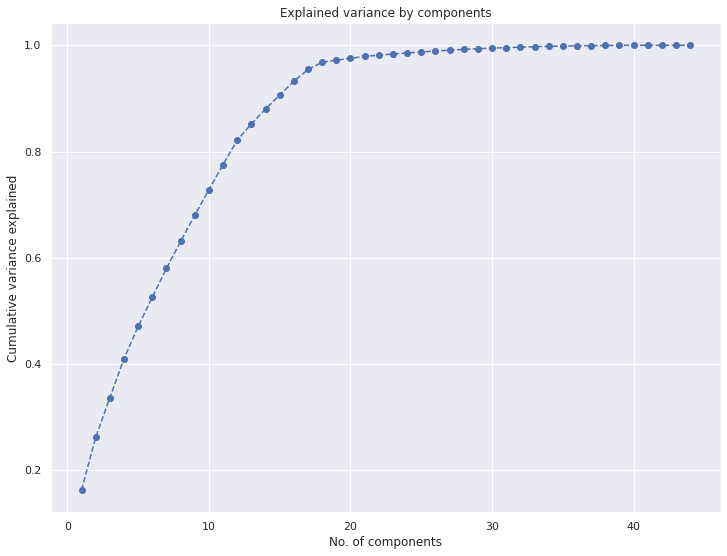

In [ ]:
plt.figure(figsize= (12,9))
plt.plot(range(1,45), pca.explained_variance_ratio_.cumsum(), marker= 'o', linestyle='--')
plt.title("Explained variance by components")
plt.xlabel("No. of components")
plt.ylabel("Cumulative variance explained")

In [ ]:
pca = PCA(n_components = 17)
pca.fit(X)

PCA(n_components=17)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

# predict on test set
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[36190   315]
 [ 9951   175]]
78.0


In [ ]:
from sklearn.linear_model import SGDClassifier

# train model
sgd = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 101).fit(X_train, y_train)

# predict on test set
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, sgd_pred))
print(round(accuracy_score(y_test, sgd_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[36478    27]
 [10111    15]]
78.0


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, sgd_pred))
print("F1 Score ",f1_score(y_test, sgd_pred))
print("Recall Score ",recall_score(y_test, sgd_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, sgd_pred))

Accuracy of model  0.7825909802491905
F1 Score  0.002950432730133753
Recall Score  0.0014813351767726645
Balanced Accuracy Score  0.5003708552339143


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, rfc_pred))

[[35052  1453]
 [ 9410   716]]
77.0
Accuracy of model  0.7670433831571273
F1 Score  0.11647010980073201
Recall Score  0.07070906577128185
Balanced Accuracy Score  0.5154531495135001


 <a id="23"></a>
    
<font size="+2" color="indigo"><b>5.5 Resampling</b></font><br>



In [ ]:
y = train_dummy[['LOAN_DEFAULT']]
X= train_dummy.loc[:, train_dummy.columns != 'LOAN_DEFAULT']
X.shape

(233154, 44)

In [ ]:
from sklearn.utils import resample
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.LOAN_DEFAULT==0]
fraud = X[X.LOAN_DEFAULT==1]

In [ ]:
# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

In [ ]:
# check new class counts
upsampled.LOAN_DEFAULT.value_counts()

1    146038
0    146038
Name: LOAN_DEFAULT, dtype: int64

In [ ]:
y_train = upsampled.LOAN_DEFAULT
X_train = upsampled.drop('LOAN_DEFAULT', axis=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

# predict on test set
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[18007 18498]
 [ 3464  6662]]
53.0


In [ ]:
from sklearn.linear_model import SGDClassifier

# train model
sgd = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 101).fit(X_train, y_train)

# predict on test set
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, sgd_pred))
print(round(accuracy_score(y_test, sgd_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[11076 25429]
 [ 1846  8280]]
42.0


# Downsample

In [ ]:
from sklearn.utils import resample
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.LOAN_DEFAULT==0]
fraud = X[X.LOAN_DEFAULT==1]

In [ ]:
# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.LOAN_DEFAULT.value_counts()

1    146038
0    146038
Name: LOAN_DEFAULT, dtype: int64

In [ ]:
y_train = downsampled.LOAN_DEFAULT
X_train = downsampled.drop('LOAN_DEFAULT', axis=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

# predict on test set
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[18007 18498]
 [ 3464  6662]]
53.0


In [ ]:
from sklearn.linear_model import SGDClassifier

# train model
sgd = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 101).fit(X_train, y_train)

# predict on test set
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, sgd_pred))
print(round(accuracy_score(y_test, sgd_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[24434 12071]
 [ 5554  4572]]
62.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, rfc_pred))

[[33612  2893]
 [ 8816  1310]]
75.0
Accuracy of model  0.7489009457228024
F1 Score  0.18284597669062744
Recall Score  0.12936993877147937
Balanced Accuracy Score  0.5250602604417594


# Best result is obtained by Random Forest after deploying [ SMOTE](#19).

<font size="+3" color="Green"><b>Related Work:</b></font>

1. Deep diving into more methods to tackle the problem of Oversampling
2. Stacking of algos
3. Using deep learning models

<font size="+2" color="Green"><b>Please Upvote if you like the work</b></font>